<a href="https://colab.research.google.com/github/2001lida/PythonLession2/blob/hw_4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

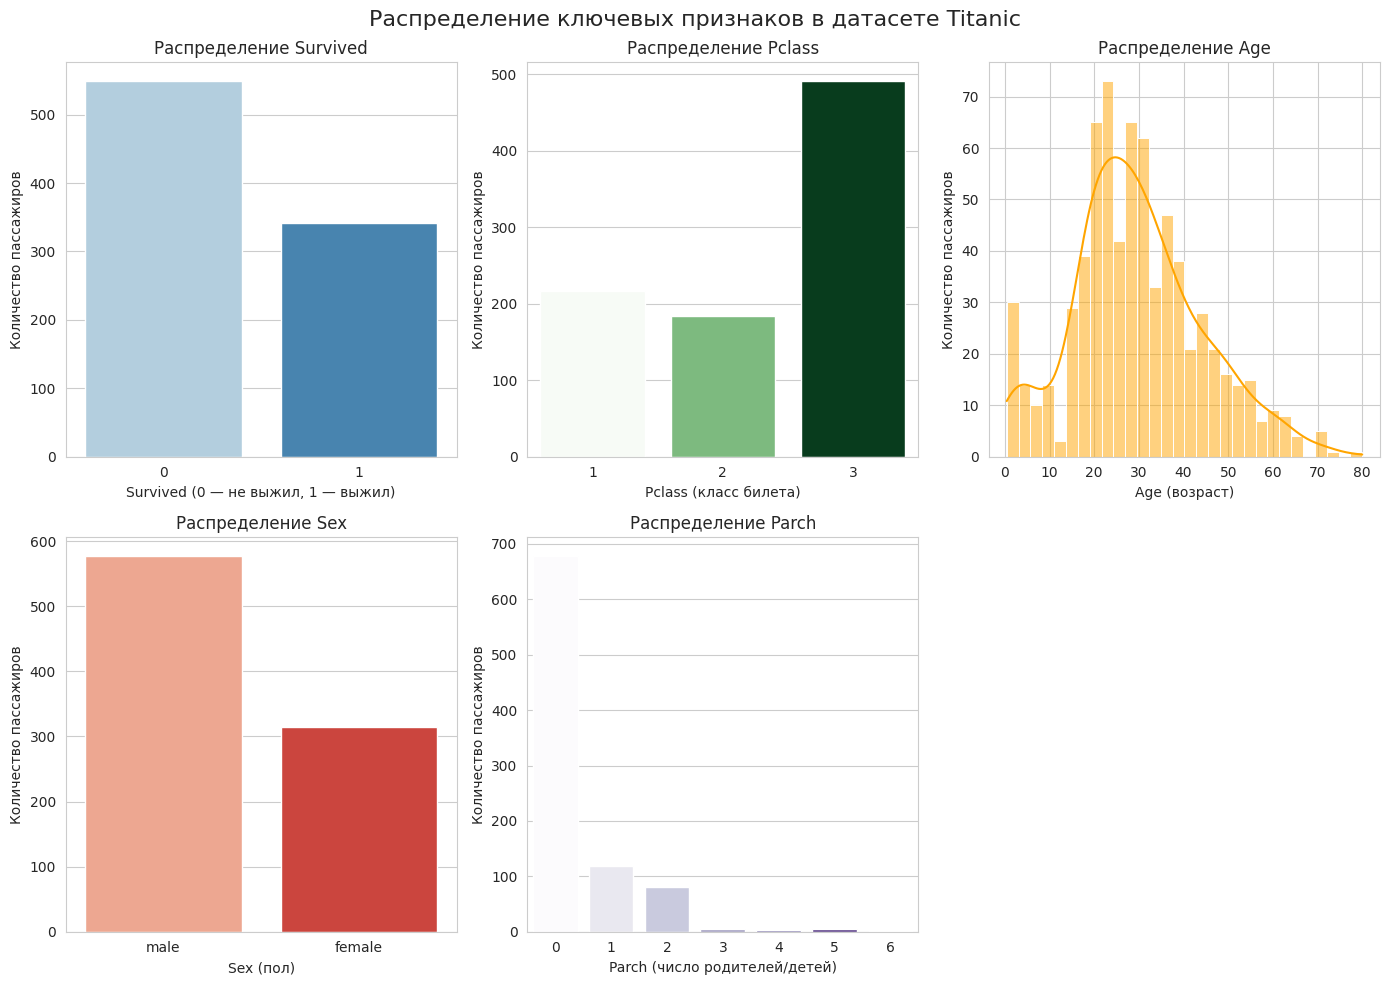

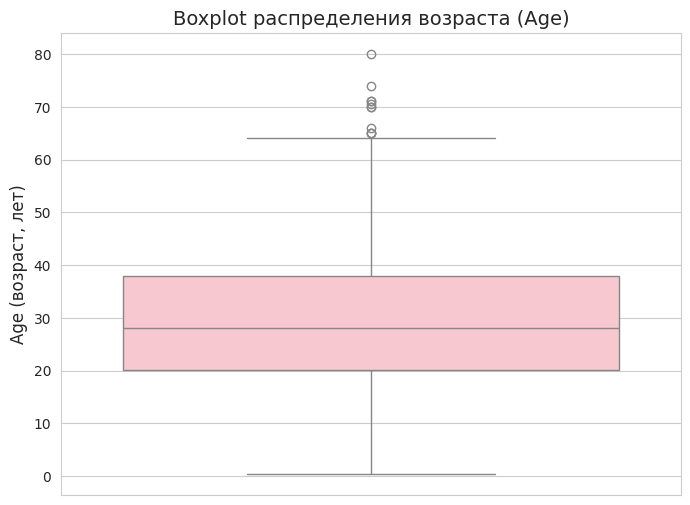

СТАТИСТИКА ПО ВОЗРАСТУ (Age) ПАССАЖИРОВ «ТИТАНИКА»
Количество наблюдений:         714
Среднее значение:           29.70 лет
Стандартное отклонение:       14.53 лет
Минимум:                     0.4 лет
25‑й перцентиль (Q1):       20.1 лет
Медиана (50%):              28.0 лет
75‑й перцентиль (Q3):       38.0 лет
Максимум:                   80.0 лет


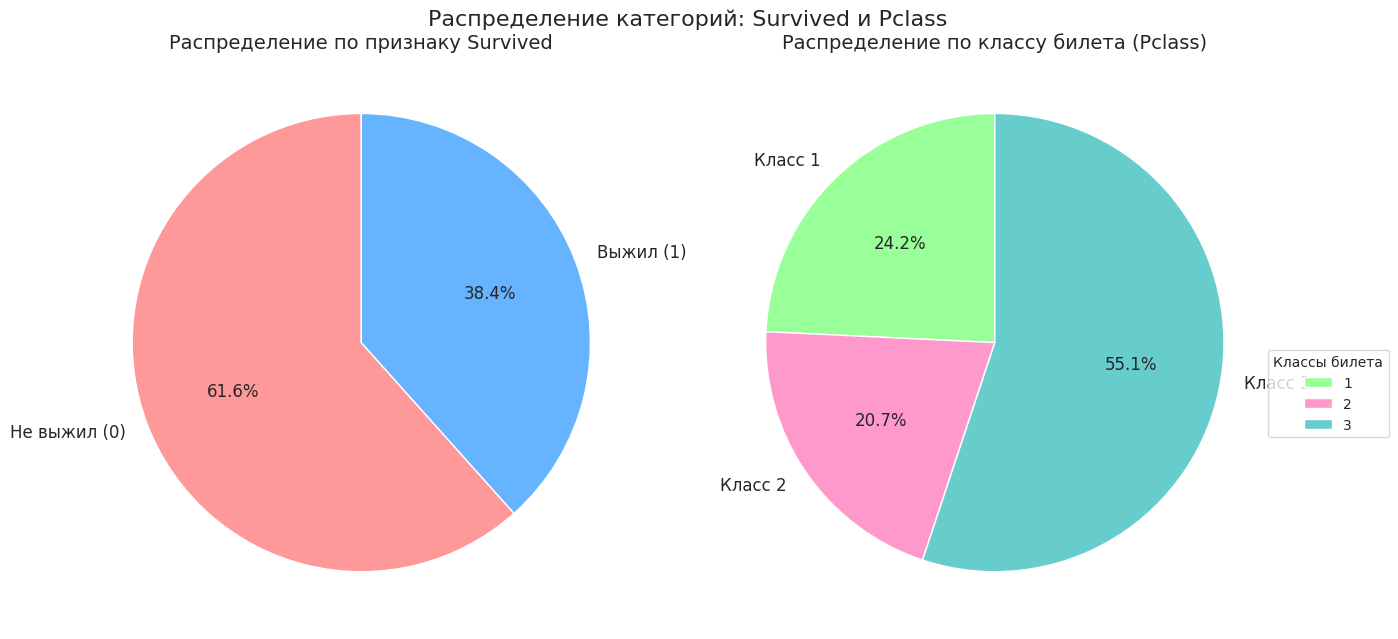

Числовые столбцы для анализа:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


<Figure size 1200x1000 with 0 Axes>

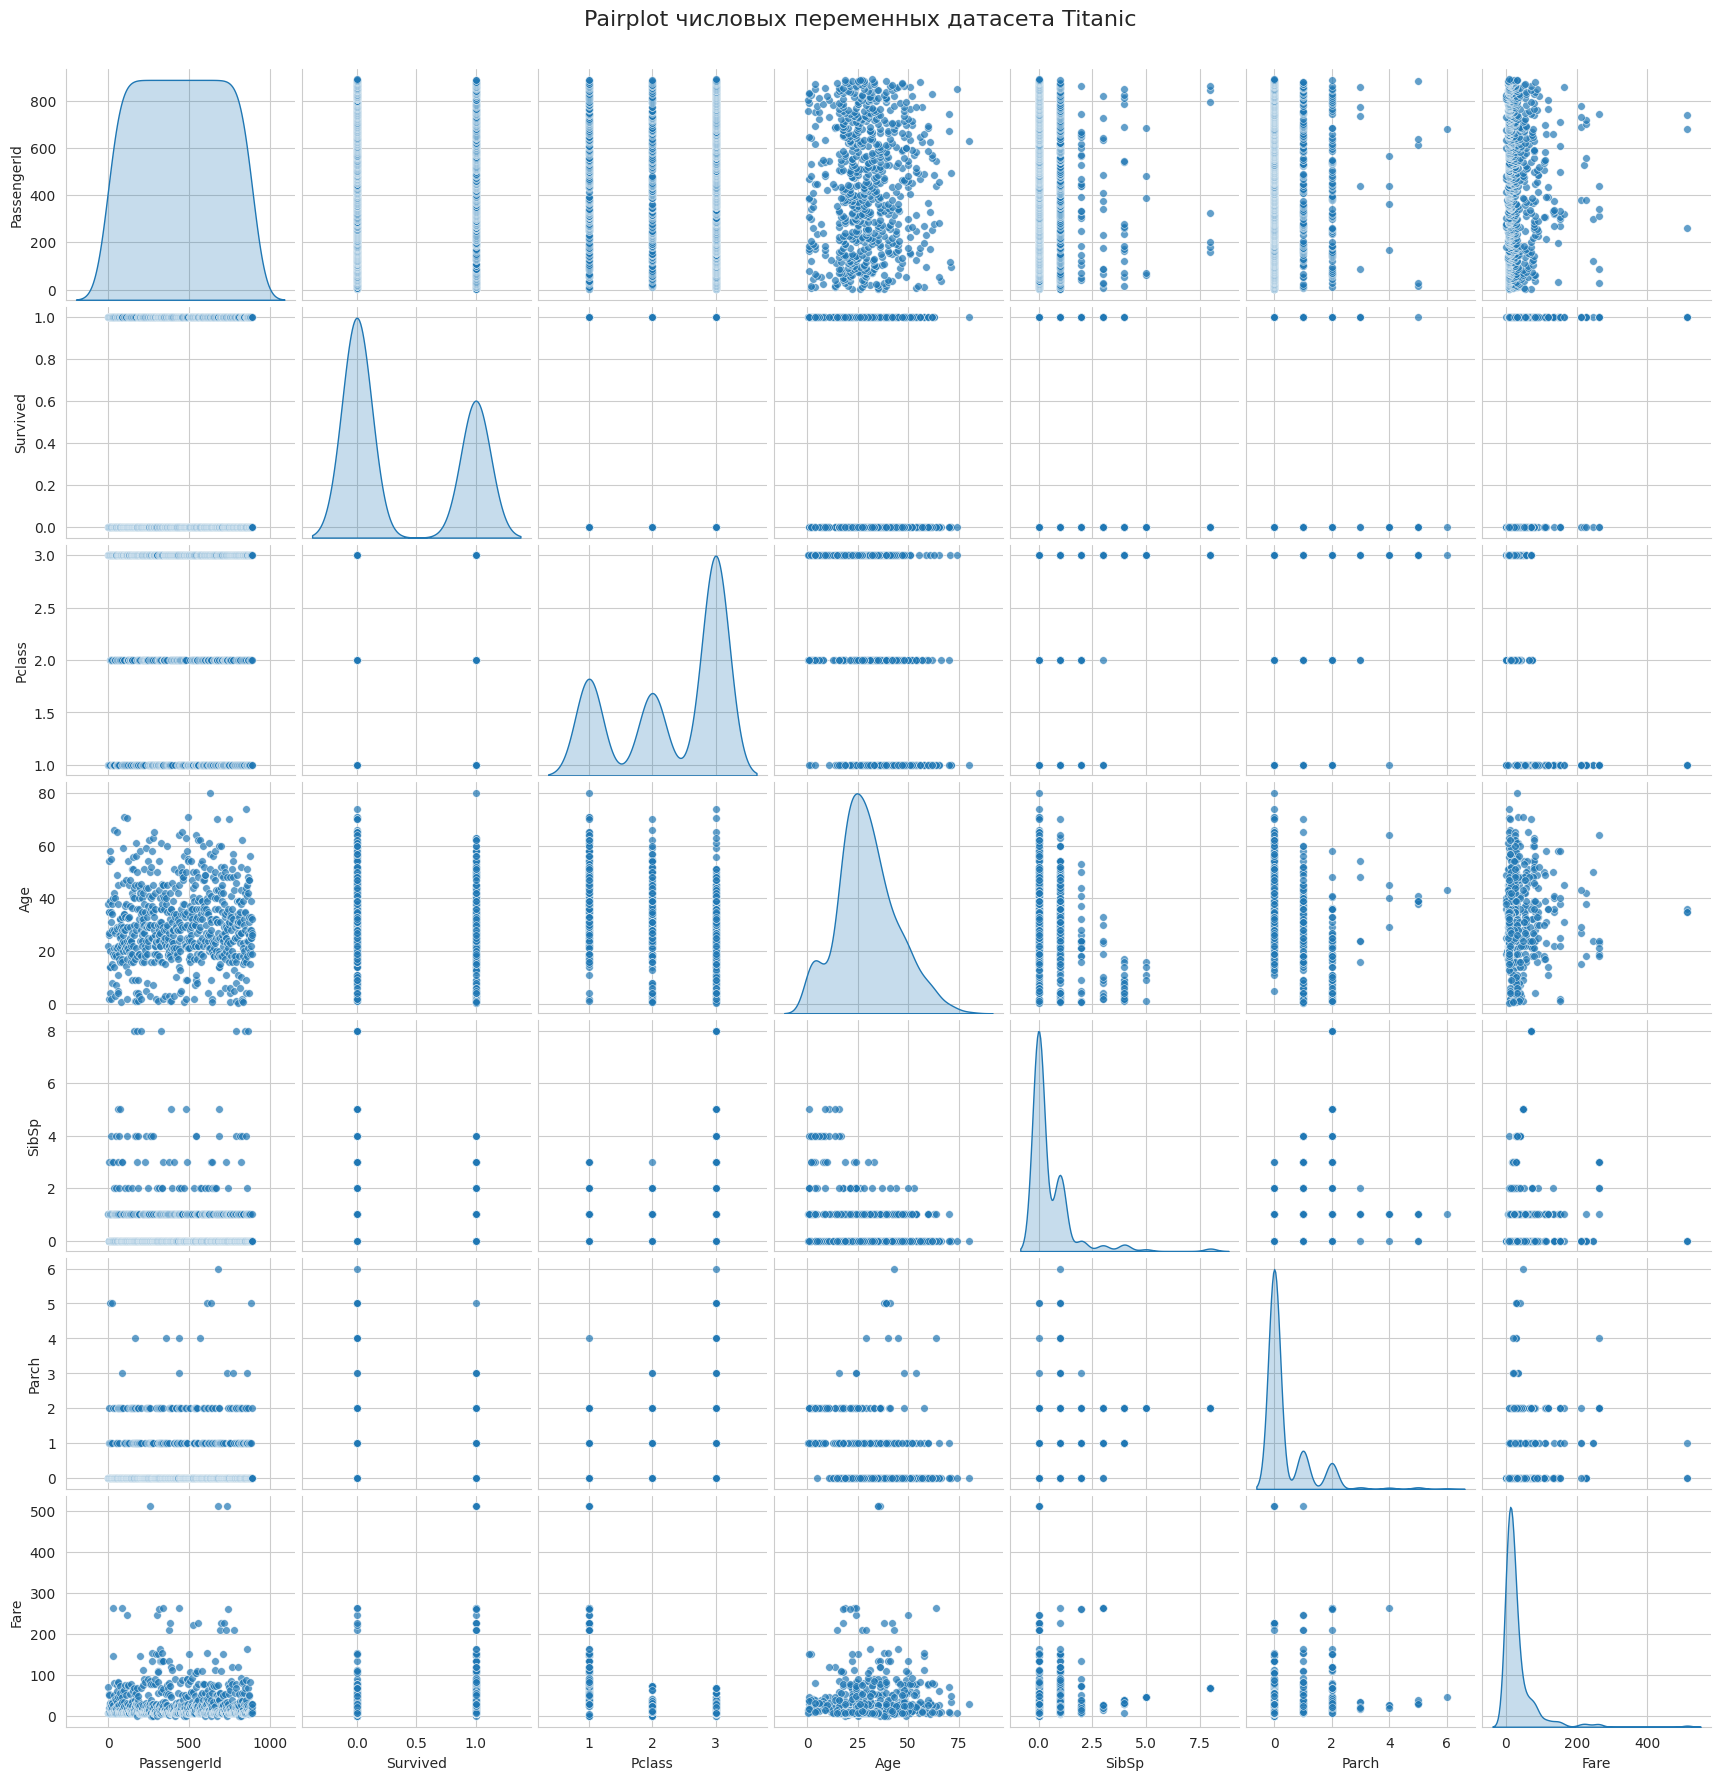

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ----------------------------
# Загрузка датасета
# ----------------------------
df = pd.read_csv('train.csv')

sns.set_style("whitegrid")

# ============================================================
# 1) Распределение ключевых признаков (5 графиков на сетке)
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('Распределение ключевых признаков в датасете Titanic', fontsize=16, y=0.98)

# 1. Survived
ax = axes[0, 0]
sns.countplot(data=df, x='Survived', hue='Survived', palette='Blues', ax=ax)
ax.set_title('Распределение Survived')
ax.set_xlabel('Survived (0 — не выжил, 1 — выжил)')
ax.set_ylabel('Количество пассажиров')
ax.legend(title='Статус', labels=['Не выжил (0)', 'Выжил (1)'])

# 2. Pclass
ax = axes[0, 1]
sns.countplot(data=df, x='Pclass', hue='Pclass', palette='Greens', ax=ax)
ax.set_title('Распределение Pclass')
ax.set_xlabel('Pclass (класс билета)')
ax.set_ylabel('Количество пассажиров')
ax.legend(title='Класс', labels=['1 класс', '2 класс', '3 класс'])

# 3. Age (hist + KDE)
ax = axes[0, 2]
sns.histplot(data=df, x='Age', bins=30, kde=True, color='orange', ax=ax, label='Возраст')
ax.set_title('Распределение Age')
ax.set_xlabel('Age (возраст, лет)')
ax.set_ylabel('Количество пассажиров')
ax.legend(title='Показатель')

# 4. Sex
ax = axes[1, 0]
sns.countplot(data=df, x='Sex', hue='Sex', palette='Reds', ax=ax)
ax.set_title('Распределение Sex')
ax.set_xlabel('Sex (пол)')
ax.set_ylabel('Количество пассажиров')
ax.legend(title='Пол', labels=['Женщины', 'Мужчины'])

# 5. Parch
ax = axes[1, 1]
sns.countplot(data=df, x='Parch', hue='Parch', palette='Purples', ax=ax)
ax.set_title('Распределение Parch')
ax.set_xlabel('Parch (число родителей/детей)')
ax.set_ylabel('Количество пассажиров')
ax.legend(title='Parch', bbox_to_anchor=(1.02, 1), loc='upper left')

# 6. Пустая подграфика
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ============================================================
# 2) Boxplot возраста (Age)
# ============================================================
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, y='Age', color='pink')
plt.title('Boxplot распределения возраста (Age)', fontsize=14)
plt.xlabel('Пассажиры')
plt.ylabel('Age (возраст, лет)', fontsize=12)

# легенду для одиночного boxplot обычно не делают, но можно так:
from matplotlib.patches import Patch
plt.legend(handles=[Patch(facecolor='pink', label='Age')], title='Показатель', loc='upper right')

plt.show()

# ============================================================
# 3) Описательная статистика по возрасту (Age)
# ============================================================
age_stats = df['Age'].describe()

print("СТАТИСТИКА ПО ВОЗРАСТУ (Age) ПАССАЖИРОВ «ТИТАНИКА»")
print("=" * 50)
print(f"Количество наблюдений:      {age_stats['count']:8.0f}")
print(f"Среднее значение:          {age_stats['mean']:8.2f} лет")
print(f"Стандартное отклонение:    {age_stats['std']:8.2f} лет")
print(f"Минимум:                   {age_stats['min']:8.1f} лет")
print(f"25-й перцентиль (Q1):      {age_stats['25%']:8.1f} лет")
print(f"Медиана (50%):             {age_stats['50%']:8.1f} лет")
print(f"75-й перцентиль (Q3):      {age_stats['75%']:8.1f} лет")
print(f"Максимум:                  {age_stats['max']:8.1f} лет")

# ============================================================
# 4) Круговые диаграммы: Survived и Pclass + легенды
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Распределение категорий: Survived и Pclass', fontsize=16, y=0.95)

# Survived
survived_counts = df['Survived'].value_counts().sort_index()
wedges1, texts1, autotexts1 = axes[0].pie(
    survived_counts,
    labels=['Не выжил (0)', 'Выжил (1)'],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)
axes[0].set_title('Распределение по признаку Survived', fontsize=14)
axes[0].legend(wedges1, ['Не выжил (0)', 'Выжил (1)'], title='Survived', loc='best')

# Pclass
pclass_counts = df['Pclass'].value_counts().sort_index()
labels_pclass = [f'Класс {cls}' for cls in pclass_counts.index]

wedges2, texts2, autotexts2 = axes[1].pie(
    pclass_counts,
    labels=labels_pclass,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)
axes[1].set_title('Распределение по классу билета (Pclass)', fontsize=14)
axes[1].legend(wedges2, labels_pclass, title='Класс билета', loc='best')

plt.tight_layout()
plt.show()

# ============================================================
# 5) Pairplot числовых переменных (подписи осей уже есть автоматически)
# ============================================================
numeric_cols = df.select_dtypes(include=['number']).columns
print("Числовые столбцы для анализа:")
print(numeric_cols.tolist())

pair = sns.pairplot(
    data=df[numeric_cols],
    plot_kws={'s': 30, 'alpha': 0.7},
    diag_kind='kde',
    height=2.5,
    aspect=1
)

pair.fig.suptitle('Pairplot числовых переменных датасета Titanic', y=1.02, fontsize=16)

# Легенда в pairplot появляется только если задан hue, например:
# sns.pairplot(..., hue='Survived')
plt.show()

# ============================================================
# 6) Sunburst (Plotly) по классу и полу + title + legend
# ============================================================
df_plot = (
    df.groupby(["Pclass", "Sex"])
      .size()
      .reset_index(name="count")
)

df_plot["Класс"] = df_plot["Pclass"].map({1: "1 класс", 2: "2 класс", 3: "3 класс"})
df_plot["Пол"] = df_plot["Sex"].map({"male": "Мужчины", "female": "Женщины"})

fig = px.sunburst(
    df_plot,
    path=["Класс", "Пол"],
    values="count",
    color="Пол",  # чтобы появилась легенда
    title="Пассажиры Titanic по классу и полу (Sunburst)"
)

fig.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br>"
        "Пассажиров: %{value}<br>"
        "Доля от всех: %{percentRoot:.2%}"
        "<extra></extra>"
    )
)

fig.update_layout(
    margin=dict(t=60, l=10, r=10, b=10),
    legend_title_text="Пол"
)

fig.show()

